In [81]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

In [82]:
model = MobileNetV2(weights='imagenet')
model.summary()

14548992/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

In [83]:
def inference(x):
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return decode_predictions(preds, top=1)[0][0][1]

In [84]:
img_path = '/content/jakob-rosen-AOU1SGZ8cG8-unsplash.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)

In [85]:
inference(x)

'racer'

In [88]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


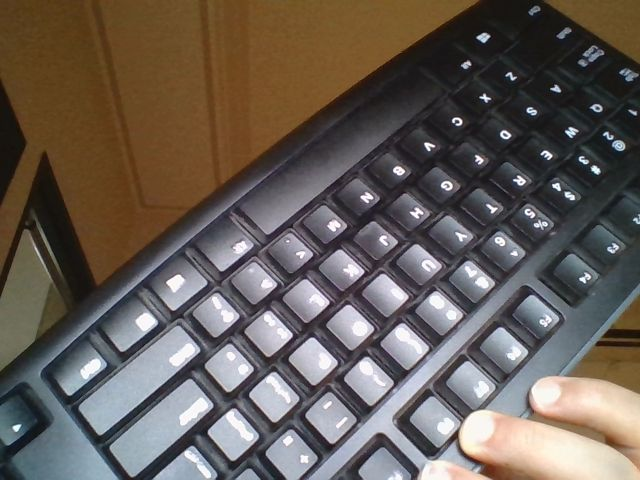

In [155]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [156]:
import cv2
from google.colab.patches import cv2_imshow

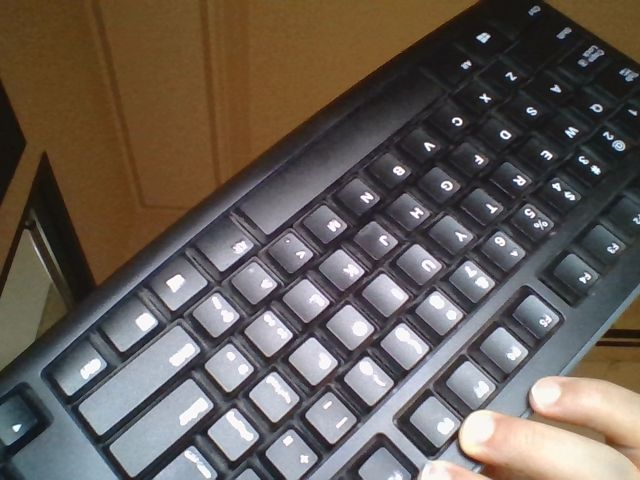

In [158]:
img = cv2.imread('/content/photo.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

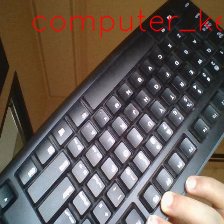

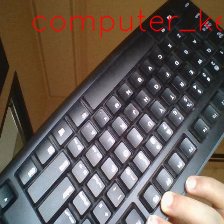

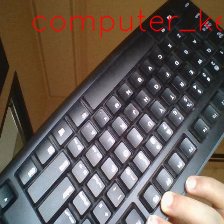

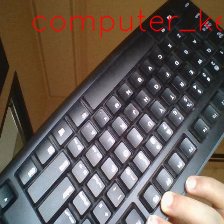

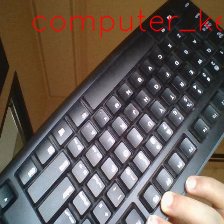

In [159]:
cap = cv2.VideoCapture(0)
for i in range(0, 5):
    ret, frame = cap.read()
    frame = cv2.resize(img, (224, 224))
    predicted = inference(frame[...,::-1])
    cv2.putText(frame,  predicted, (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), lineType=cv2.LINE_AA)
    cv2_imshow(frame)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
cap.release()
cv2.destroyAllWindows()        